In [2]:
# load dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import numpy
import numpy as np
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [3]:
# fix random seed for reproducibility
numpy.random.seed(7)

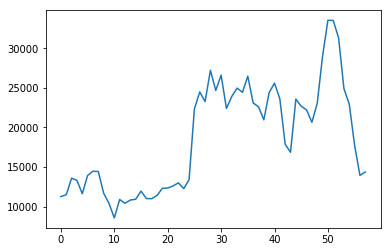

In [4]:
# load data
state_data = pandas.read_csv('state_cleaned_lite.csv', usecols=[1], engine='python')
plt.plot(state_data)
plt.show()

In [6]:
# load data
state_data = pandas.read_csv('state_cleaned_lite.csv', usecols=[1], engine='python')

state_data = state_data.values
state_data = state_data.astype('float32')


In [5]:
scaler = MinMaxScaler(feature_range=(0, 1))
state_data = scaler.fit_transform(state_data)

In [6]:
# split into train and test sets
train_size = int(len(state_data) * 0.67)
test_size = len(state_data) - train_size
train, test = state_data[0:train_size,:], state_data[train_size:len(state_data),:]

In [7]:
# convert an array of values into a dataset matrix
def create_dataset(state_data, look_back=1):
	dataX, dataY = [], []
	for i in range(len(state_data)-look_back-1):
		a = state_data[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(state_data[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [8]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [9]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [10]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
 - 1s - loss: 0.1291
Epoch 2/100
 - 0s - loss: 0.1056
Epoch 3/100
 - 0s - loss: 0.0870
Epoch 4/100
 - 0s - loss: 0.0723
Epoch 5/100
 - 0s - loss: 0.0616
Epoch 6/100
 - 0s - loss: 0.0535
Epoch 7/100
 - 0s - loss: 0.0476
Epoch 8/100
 - 0s - loss: 0.0435
Epoch 9/100
 - 0s - loss: 0.0404
Epoch 10/100
 - 0s - loss: 0.0383
Epoch 11/100
 - 0s - loss: 0.0363
Epoch 12/100
 - 0s - loss: 0.0348
Epoch 13/100
 - 0s - loss: 0.0334
Epoch 14/100
 - 0s - loss: 0.0319
Epoch 15/100
 - 0s - loss: 0.0307
Epoch 16/100
 - 0s - loss: 0.0294
Epoch 17/100
 - 0s - loss: 0.0283
Epoch 18/100
 - 0s - loss: 0.0267
Epoch 19/100
 - 0s - loss: 0.0254
Epoch 20/100
 - 0s - loss: 0.0243
Epoch 21/100
 - 0s - loss: 0.0229
Epoch 22/100
 - 0s - loss: 0.0216
Epoch 23/100
 - 0s - loss: 0.0205
Epoch 24/100
 - 0s - loss: 0.0194
Epoch 25/100
 - 0s - loss: 0.0183
Epoch 26/100
 - 0s - loss: 0.0173
Epoch

In [11]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [12]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 2215.41 RMSE
Test Score: 3675.80 RMSE


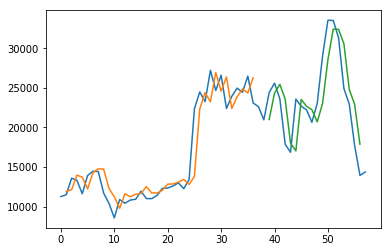

In [13]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(state_data)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(state_data)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(state_data)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(state_data))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [14]:
# re-train the LSTM on all data
look_back = 30 # look back further
trainX, trainY = create_dataset(state_data, look_back)
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))

# re-create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
 - 1s - loss: 0.3006
Epoch 2/100
 - 0s - loss: 0.1421
Epoch 3/100
 - 0s - loss: 0.0682
Epoch 4/100
 - 0s - loss: 0.0514
Epoch 5/100
 - 0s - loss: 0.0463
Epoch 6/100
 - 0s - loss: 0.0449
Epoch 7/100
 - 0s - loss: 0.0437
Epoch 8/100
 - 0s - loss: 0.0418
Epoch 9/100
 - 0s - loss: 0.0411
Epoch 10/100
 - 0s - loss: 0.0393
Epoch 11/100
 - 0s - loss: 0.0389
Epoch 12/100
 - 0s - loss: 0.0377
Epoch 13/100
 - 0s - loss: 0.0365
Epoch 14/100
 - 0s - loss: 0.0369
Epoch 15/100
 - 0s - loss: 0.0358
Epoch 16/100
 - 0s - loss: 0.0341
Epoch 17/100
 - 0s - loss: 0.0331
Epoch 18/100
 - 0s - loss: 0.0323
Epoch 19/100
 - 0s - loss: 0.0321
Epoch 20/100
 - 0s - loss: 0.0315
Epoch 21/100
 - 0s - loss: 0.0319
Epoch 22/100
 - 0s - loss: 0.0296
Epoch 23/100
 - 0s - loss: 0.0295
Epoch 24/100
 - 0s - loss: 0.0281
Epoch 25/100
 - 0s - loss: 0.0270
Epoch 26/100
 - 0s - loss: 0.0265
Epoch 27/100
 - 0s - loss: 0.0255
Epoch 28/100
 - 0s - loss: 0.0247
Epoch 29/100
 - 0s - loss: 0.0240
Epoch 30/100
 - 0s - lo

58


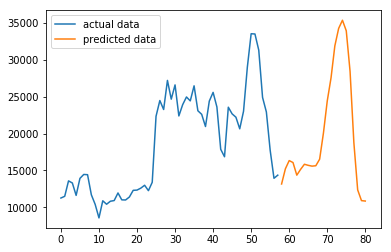

In [18]:
# making future prediction
flatten_state_data = state_data.reshape(-1)
val = flatten_state_data[-look_back:] # last batch in the training data
pred_list = []
for i in range(23): # predict the next 23 points
    pred = model.predict(val.reshape(1,1,look_back))
    pred_list = np.append(pred_list,pred)
    val = np.append(np.delete(val, 0), pred) # update the data batch to be fed in the next iteration
pred_list = pred_list.reshape(pred_list.shape[0],1)

# invert prediction
pred_list = scaler.inverse_transform(pred_list)

# plot
data_len = len(state_data)
print(data_len)
plt.plot(list(range(data_len)),scaler.inverse_transform(state_data),label="actual data")
plt.plot(list(range(data_len,data_len+len(pred_list))),pred_list,label="predicted data")
plt.legend()
plt.show()

In [22]:
pred_list


array([[13166.56540175],
       [15228.21422147],
       [16343.26432478],
       [16079.15649759],
       [14367.94903804],
       [15153.21013988],
       [15844.39679829],
       [15699.72824703],
       [15590.06994249],
       [15644.46858901],
       [16528.94860345],
       [20077.53298864],
       [24418.62110174],
       [27578.50348716],
       [31912.85023779],
       [34281.22173986],
       [35388.33355554],
       [33960.44282146],
       [28449.90223442],
       [18772.90394482],
       [12366.08242113],
       [10911.60181244],
       [10853.24668404]])

In [23]:
len(pred_list)

23